Documentation of `flexitext` https://github.com/tomicapretto/flexitext 

a neat library that allows you to write text in a markup language to be rendered in matplotlib figures

In [5]:
%config IPCompleter.use_jedi = False
%pdb off
%load_ext autoreload
%autoreload 3
import matplotlib
import matplotlib.pyplot as plt
from flexitext import flexitext
from PIL import Image, ImageDraw, ImageFont


def empty_image(width: int=800, height: int=600, background_color = (255, 255, 255, 0)) -> Image:
	# Create a new empty image
    # Parameters: mode (RGB, RGBA, etc.), size (width, height), color (default is black)

    if len(background_color) > 3:
        img_type: str = 'RGB'
    else:
        assert len(background_color) == 4, f"length of background_color should be 3 or 4, but it was: {background_color}"
        img_type: str = 'RGBA'
        
    # Create a white background image
    # width, height = 800, 600
    # background_color = (255, 255, 255)  # White in RGB
    # img = Image.new('RGB', (width, height), background_color)

    # Create a transparent image (with alpha channel)
    # transparent_img = Image.new('RGBA', (width, height), (255, 255, 255, 0))  # Transparent white
    return Image.new(img_type, (width, height), background_color)



Automatic pdb calling has been turned OFF
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
fig.subplots_adjust(top=0.8, left=0.025)

x = [1, 2, 3]
y_blue = [2, 2.7, 4.5]
y_red = [1, 3, 2.5]


ax.scatter(x, y_blue, color="royalblue", s=120)
ax.scatter(x, y_red, color="crimson", s=120)

# Add flexitext
text = (
    "<name:Montserrat><size:24>A <weight:bold>great chart</> showing</>\n"
    "<size:18>the values for the "
    "<color:royalblue, weight:bold>blues</> and the <color:crimson, weight:bold>reds</></></>"
)
flexitext(0.025, 0.8, text, va="bottom", xycoords="figure fraction");

In [ ]:
text = (
    "<size:28, color:blueviolet, name:Montserrat>You can write using\n</>"
    "<color:grey, size:24>multiple formats,\nand linebreaks\n\n"
    "<color:royalblue, name:Montserrat>also <weight:bold>bold text\n\n</></>"
    "<name:Montserrat>and why not <color:royalblue, style:italic>italics</> too</></>"
)

fig, ax = plt.subplots(figsize=(9, 6))
flexitext(0.5, 0.5, text, ha="center", ma="center");

In [ ]:
# Add flexitext
text = (
    "<name:Montserrat><size:24>A <weight:bold>great chart</> showing</>\n"
    "<size:18>the values for the "
    "<color:royalblue, weight:bold>blues</> and the <color:crimson, weight:bold>reds</></></>"
)
flexitext(0.025, 0.8, text, va="bottom", xycoords="figure fraction");

# Example: Draw Partial Opacity Text

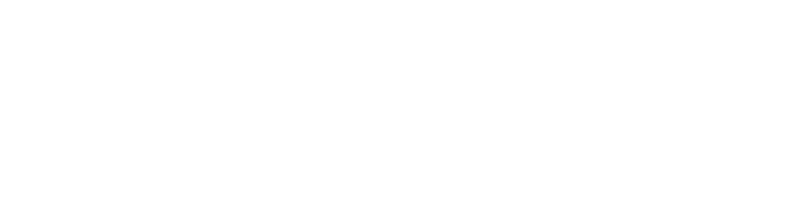

In [6]:
from PIL import Image, ImageDraw, ImageFont


empty_image = empty_image(width=800, height=200)
empty_image


In [ ]:
import pkg_resources # for Slurm templating

template_path = pkg_resources.resource_filename('pyphoplacecellanalysis.Resources', 'Templates')
template_path

ImportError: cannot import name 'tests' from 'PIL' (c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv_UV\lib\site-packages\PIL\__init__.py)

In [7]:
from copy import deepcopy


base = deepcopy(empty_image)

# get an image
# with Image.open("Pillow/Tests/images/hopper.png").convert("RGBA") as base:

# make a blank image for the text, initialized to transparent text color
txt = Image.new("RGBA", base.size, (255, 255, 255, 0))

# get a font
fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 40)
# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
d.text((10, 10), "Hello", font=fnt, fill=(255, 255, 255, 128))
# draw text, full opacity
d.text((10, 60), "World", font=fnt, fill=(255, 255, 255, 255))

out = Image.alpha_composite(base, txt)

out.show()

OSError: cannot open resource

# Example: Draw Multiline Text

In [ ]:
from PIL import Image, ImageDraw, ImageFont

# get an image
with Image.open("Pillow/Tests/images/hopper.png").convert("RGBA") as base:

    # make a blank image for the text, initialized to transparent text color
    txt = Image.new("RGBA", base.size, (255, 255, 255, 0))

    # get a font
    fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 40)
    # get a drawing context
    d = ImageDraw.Draw(txt)

    # draw text, half opacity
    d.text((10, 10), "Hello", font=fnt, fill=(255, 255, 255, 128))
    # draw text, full opacity
    d.text((10, 60), "World", font=fnt, fill=(255, 255, 255, 255))

    out = Image.alpha_composite(base, txt)

    out.show()